# Download screened meteo data from database (2003-2021)

**notebook version**: `3` (4 Jul 2024)  
**new in this version**: added check if downloaded data is indeed in 30MIN time resolution

- This notebook can be used to download data from the database `InfluxDB`
- Data are stored to a `.csv` file in this folder

Data from the datbase, but from the old bucket `CH-CHA_processing`.

# **Auto-settings**

## Data settings

In [1]:
DIRCONF = r'F:\Sync\luhk_work\20 - CODING\22 - POET\configs'
# DIRCONF = r'P:\Flux\RDS_calculations\_scripts\_configs\configs'  # Folder with configuration files: needed e.g. for connection to database
TIMEZONE_OFFSET_TO_UTC_HOURS = 1  # Timezone, e.g. "1" is translated to timezone "UTC+01:00" (CET, winter time)
REQUIRED_TIME_RESOLUTION = '30min'  # 30MIN time resolution

## Imports

In [2]:
import importlib.metadata
from datetime import datetime

%matplotlib inline
import seaborn as sns
from pathlib import Path
from diive.core.io.files import save_parquet

sns.set_theme('notebook')
from dbc_influxdb import dbcInflux
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")
version_dbc = importlib.metadata.version("dbc_influxdb")
print(f"dbc-influxdb version: v{version_dbc}")
dbc = dbcInflux(dirconf=DIRCONF)  # Connect to database

diive version: v0.88.0
dbc-influxdb version: v0.13.1
Reading configuration files was successful.
Connection to database works.


</br>

# **DOWNLOAD** screened data from the database

In [3]:
%%time
data_simple, data_detailed, assigned_measurements = dbc.download(
    bucket=f'ch-oe2_processed',
    measurements=['G', 'TA', 'SW', 'PPFD', 'LW', 'RH', 'PA', 'SWC', 'TS', 'PREC', 'RH'],
    fields=[
        'G_CF2_0.03_1',
        'G_CF3_0.03_1',
        'G_CF4_0.03_1',
        'G_CF5_0.03_1',
        'LW_IN_M1_1_1',
        'LW_OUT_M1_1_1',
        'NETRAD_M1_1_1',
        'NETRAD_M1_2_1',
        'PA_CF1_1_1',
        'PPFD_DIF_M1_1_1',
        'PPFD_IN_M1_1_1',
        # 'PPFD_OUT_M1_1_1',  # few records
        'PREC_TOT_M2_1_1',
        'RH_T1_2_1',
        'SW_IN_M1_1_1',
        'SW_OUT_M1_1_1',
        # 'SW_DIF_M1_1_1',  # few records
        'SWC_CF1_0.05_1',
        'SWC_CF1_0.05_2',
        'SWC_CF1_0.05_3',
        'SWC_CF1_0.15_1',
        'SWC_CF1_0.1_2',
        'SWC_CF1_0.1_3',
        'SWC_CF1_0.2_2',
        'SWC_CF1_0.2_3',
        'SWC_CF1_0.3_1',
        'SWC_CF1_0.3_2',
        'SWC_CF1_0.3_3',
        'SWC_CF1_0.4_2',
        'SWC_CF1_0.5_1',
        'SWC_CF1_0.5_2',
        'SWC_CF1_0.5_3',
        'SWC_CF1_0.6_2',
        'SWC_CF1_0.75_2',
        'SWC_CF1_0.7_3',
        'SWC_CF1_1_2',
        'SWC_CF1_1_3',
        'TA_T1_2_1',
        'TS_CF1_0.05_1',
        'TS_CF1_0.05_2',
        'TS_CF1_0.05_3',
        'TS_CF1_0.15_1',
        'TS_CF1_0.1_2',
        'TS_CF1_0.1_3',
        'TS_CF1_0.2_2',
        'TS_CF1_0.2_3',
        'TS_CF1_0.3_1',
        'TS_CF1_0.3_2',
        'TS_CF1_0.3_3',
        'TS_CF1_0.4_2',
        'TS_CF1_0.5_1',
        'TS_CF1_0.5_2',
        'TS_CF1_0.5_3',        
        'TS_CF1_0.6_2',
        'TS_CF1_0.75_2',
        'TS_CF1_0.7_3',
        'TS_CF1_1_2',
        'TS_CF1_1_3',
        'TS_CF2_0.015_1',
        'TS_CF3_0.015_1',
        'TS_CF4_0.015_1',
        'TS_CF5_0.015_1',        
        'TS_PRF1_CF1_0.05_1',
        'TS_PRF1_CF1_0.15_1',
        'TS_PRF1_CF1_0.1_1',
        'TS_PRF1_CF1_0.3_1',
        'TS_PRF1_CF1_0.5_1',
        'TS_PRF2_CF1_0.05_1',
        'TS_PRF2_CF1_0.1_1',
        'TS_PRF2_CF1_0.2_1',
        'TS_PRF2_CF1_0.3_1',
        'TS_PRF2_CF1_0.5_1',
        'TS_PRF2_CF1_1_1',
        'TS_PRF_CF1_0.05_1',
        'TS_PRF_CF1_0.1_1',
        'TS_PRF_CF1_0.2_1',
        'TS_PRF_CF1_0.5_1',
        'TS_PRF_CF1_1_1'                
    ],
    start='2003-01-01 00:00:01',  # Download data starting with this date (the start date itself IS included),
    stop='2022-01-10 00:00:01',  # Download data before this date (the stop date itself IS NOT included),
    timezone_offset_to_utc_hours=TIMEZONE_OFFSET_TO_UTC_HOURS,
    data_version='meteoscreening_mst'
)


DOWNLOADING
    from bucket ch-oe2_processed
    variables ['G_CF2_0.03_1', 'G_CF3_0.03_1', 'G_CF4_0.03_1', 'G_CF5_0.03_1', 'LW_IN_M1_1_1', 'LW_OUT_M1_1_1', 'NETRAD_M1_1_1', 'NETRAD_M1_2_1', 'PA_CF1_1_1', 'PPFD_DIF_M1_1_1', 'PPFD_IN_M1_1_1', 'PREC_TOT_M2_1_1', 'RH_T1_2_1', 'SW_IN_M1_1_1', 'SW_OUT_M1_1_1', 'SWC_CF1_0.05_1', 'SWC_CF1_0.05_2', 'SWC_CF1_0.05_3', 'SWC_CF1_0.15_1', 'SWC_CF1_0.1_2', 'SWC_CF1_0.1_3', 'SWC_CF1_0.2_2', 'SWC_CF1_0.2_3', 'SWC_CF1_0.3_1', 'SWC_CF1_0.3_2', 'SWC_CF1_0.3_3', 'SWC_CF1_0.4_2', 'SWC_CF1_0.5_1', 'SWC_CF1_0.5_2', 'SWC_CF1_0.5_3', 'SWC_CF1_0.6_2', 'SWC_CF1_0.75_2', 'SWC_CF1_0.7_3', 'SWC_CF1_1_2', 'SWC_CF1_1_3', 'TA_T1_2_1', 'TS_CF1_0.05_1', 'TS_CF1_0.05_2', 'TS_CF1_0.05_3', 'TS_CF1_0.15_1', 'TS_CF1_0.1_2', 'TS_CF1_0.1_3', 'TS_CF1_0.2_2', 'TS_CF1_0.2_3', 'TS_CF1_0.3_1', 'TS_CF1_0.3_2', 'TS_CF1_0.3_3', 'TS_CF1_0.4_2', 'TS_CF1_0.5_1', 'TS_CF1_0.5_2', 'TS_CF1_0.5_3', 'TS_CF1_0.6_2', 'TS_CF1_0.75_2', 'TS_CF1_0.7_3', 'TS_CF1_1_2', 'TS_CF1_1_3', 'TS_CF2_0.015_1',

In [4]:
data_simple

G_CF2_0.03_1  G_CF3_0.03_1  G_CF4_0.03_1  G_CF5_0.03_1  LW_IN_M1_1_1  LW_OUT_M1_1_1    PA_CF1_1_1  PPFD_DIF_M1_1_1  PPFD_IN_M1_1_1  PREC_TOT_M2_1_1  RH_T1_2_1  SWC_CF1_0.05_1  SWC_CF1_0.05_2  SWC_CF1_0.05_3  SWC_CF1_0.15_1  ...  TS_PRF1_CF1_0.15_1  TS_PRF1_CF1_0.1_1  TS_PRF1_CF1_0.3_1  TS_PRF1_CF1_0.5_1  TS_PRF2_CF1_0.05_1  TS_PRF2_CF1_0.1_1  TS_PRF2_CF1_0.2_1  TS_PRF2_CF1_0.3_1  TS_PRF2_CF1_0.5_1  TS_PRF2_CF1_1_1  TS_PRF_CF1_0.05_1  TS_PRF_CF1_0.1_1  TS_PRF_CF1_0.2_1  TS_PRF_CF1_0.5_1  TS_PRF_CF1_1_1
TIMESTAMP_END                                                                                                                                                                                                                                        ...                                                                                                                                                                                                                                                                                       
2003-12-22 17:30:00    -14.870000    -11.770000    -12.670000    -15.880000           NaN            NaN           NaN              NaN             NaN              0.0        NaN       20.620001             NaN             NaN       10.860000  ...               2.437              2.018              3.592              4.437                 NaN                NaN                NaN                NaN                NaN              NaN                NaN               NaN               NaN               NaN             NaN
2003-12-22 18:00:00    -14.600000    -11.810000    -12.420000    -15.800000           NaN            NaN           NaN              NaN             NaN              0.0        NaN       20.629999             NaN             NaN       10.920000  ...               2.415              1.982              3.583              4.435                 NaN                NaN                NaN                NaN                NaN              NaN                NaN               NaN               NaN               NaN             NaN
2003-12-22 18:30:00    -14.470000    -11.810000    -12.170000    -15.520000           NaN            NaN           NaN              NaN             NaN              0.0        NaN       20.639999             NaN             NaN       11.020000  ...               2.397              1.945              3.579              4.434                 NaN                NaN                NaN                NaN                NaN              NaN                NaN               NaN               NaN               NaN             NaN
2003-12-22 19:00:00    -14.360000    -11.730000    -11.990000    -15.230000           NaN            NaN           NaN              NaN             NaN              0.0        NaN       20.629999             NaN             NaN       11.090000  ...               2.371              1.906              3.573              4.435                 NaN                NaN                NaN                NaN                NaN              NaN                NaN               NaN               NaN               NaN             NaN
2003-12-22 19:30:00    -14.350000    -11.680000    -11.830000    -15.070000           NaN            NaN           NaN              NaN             NaN              0.0        NaN       20.629999             NaN             NaN       11.120000  ...               2.348              1.863              3.565              4.430                 NaN                NaN                NaN                NaN                NaN              NaN                NaN               NaN               NaN               NaN             NaN
...                           ...           ...           ...           ...           ...            ...           ...              ...             ...              ...        ...             ...             ...             ...             ...  ...                 ...                ...                ...                ...

## Plot downloaded data

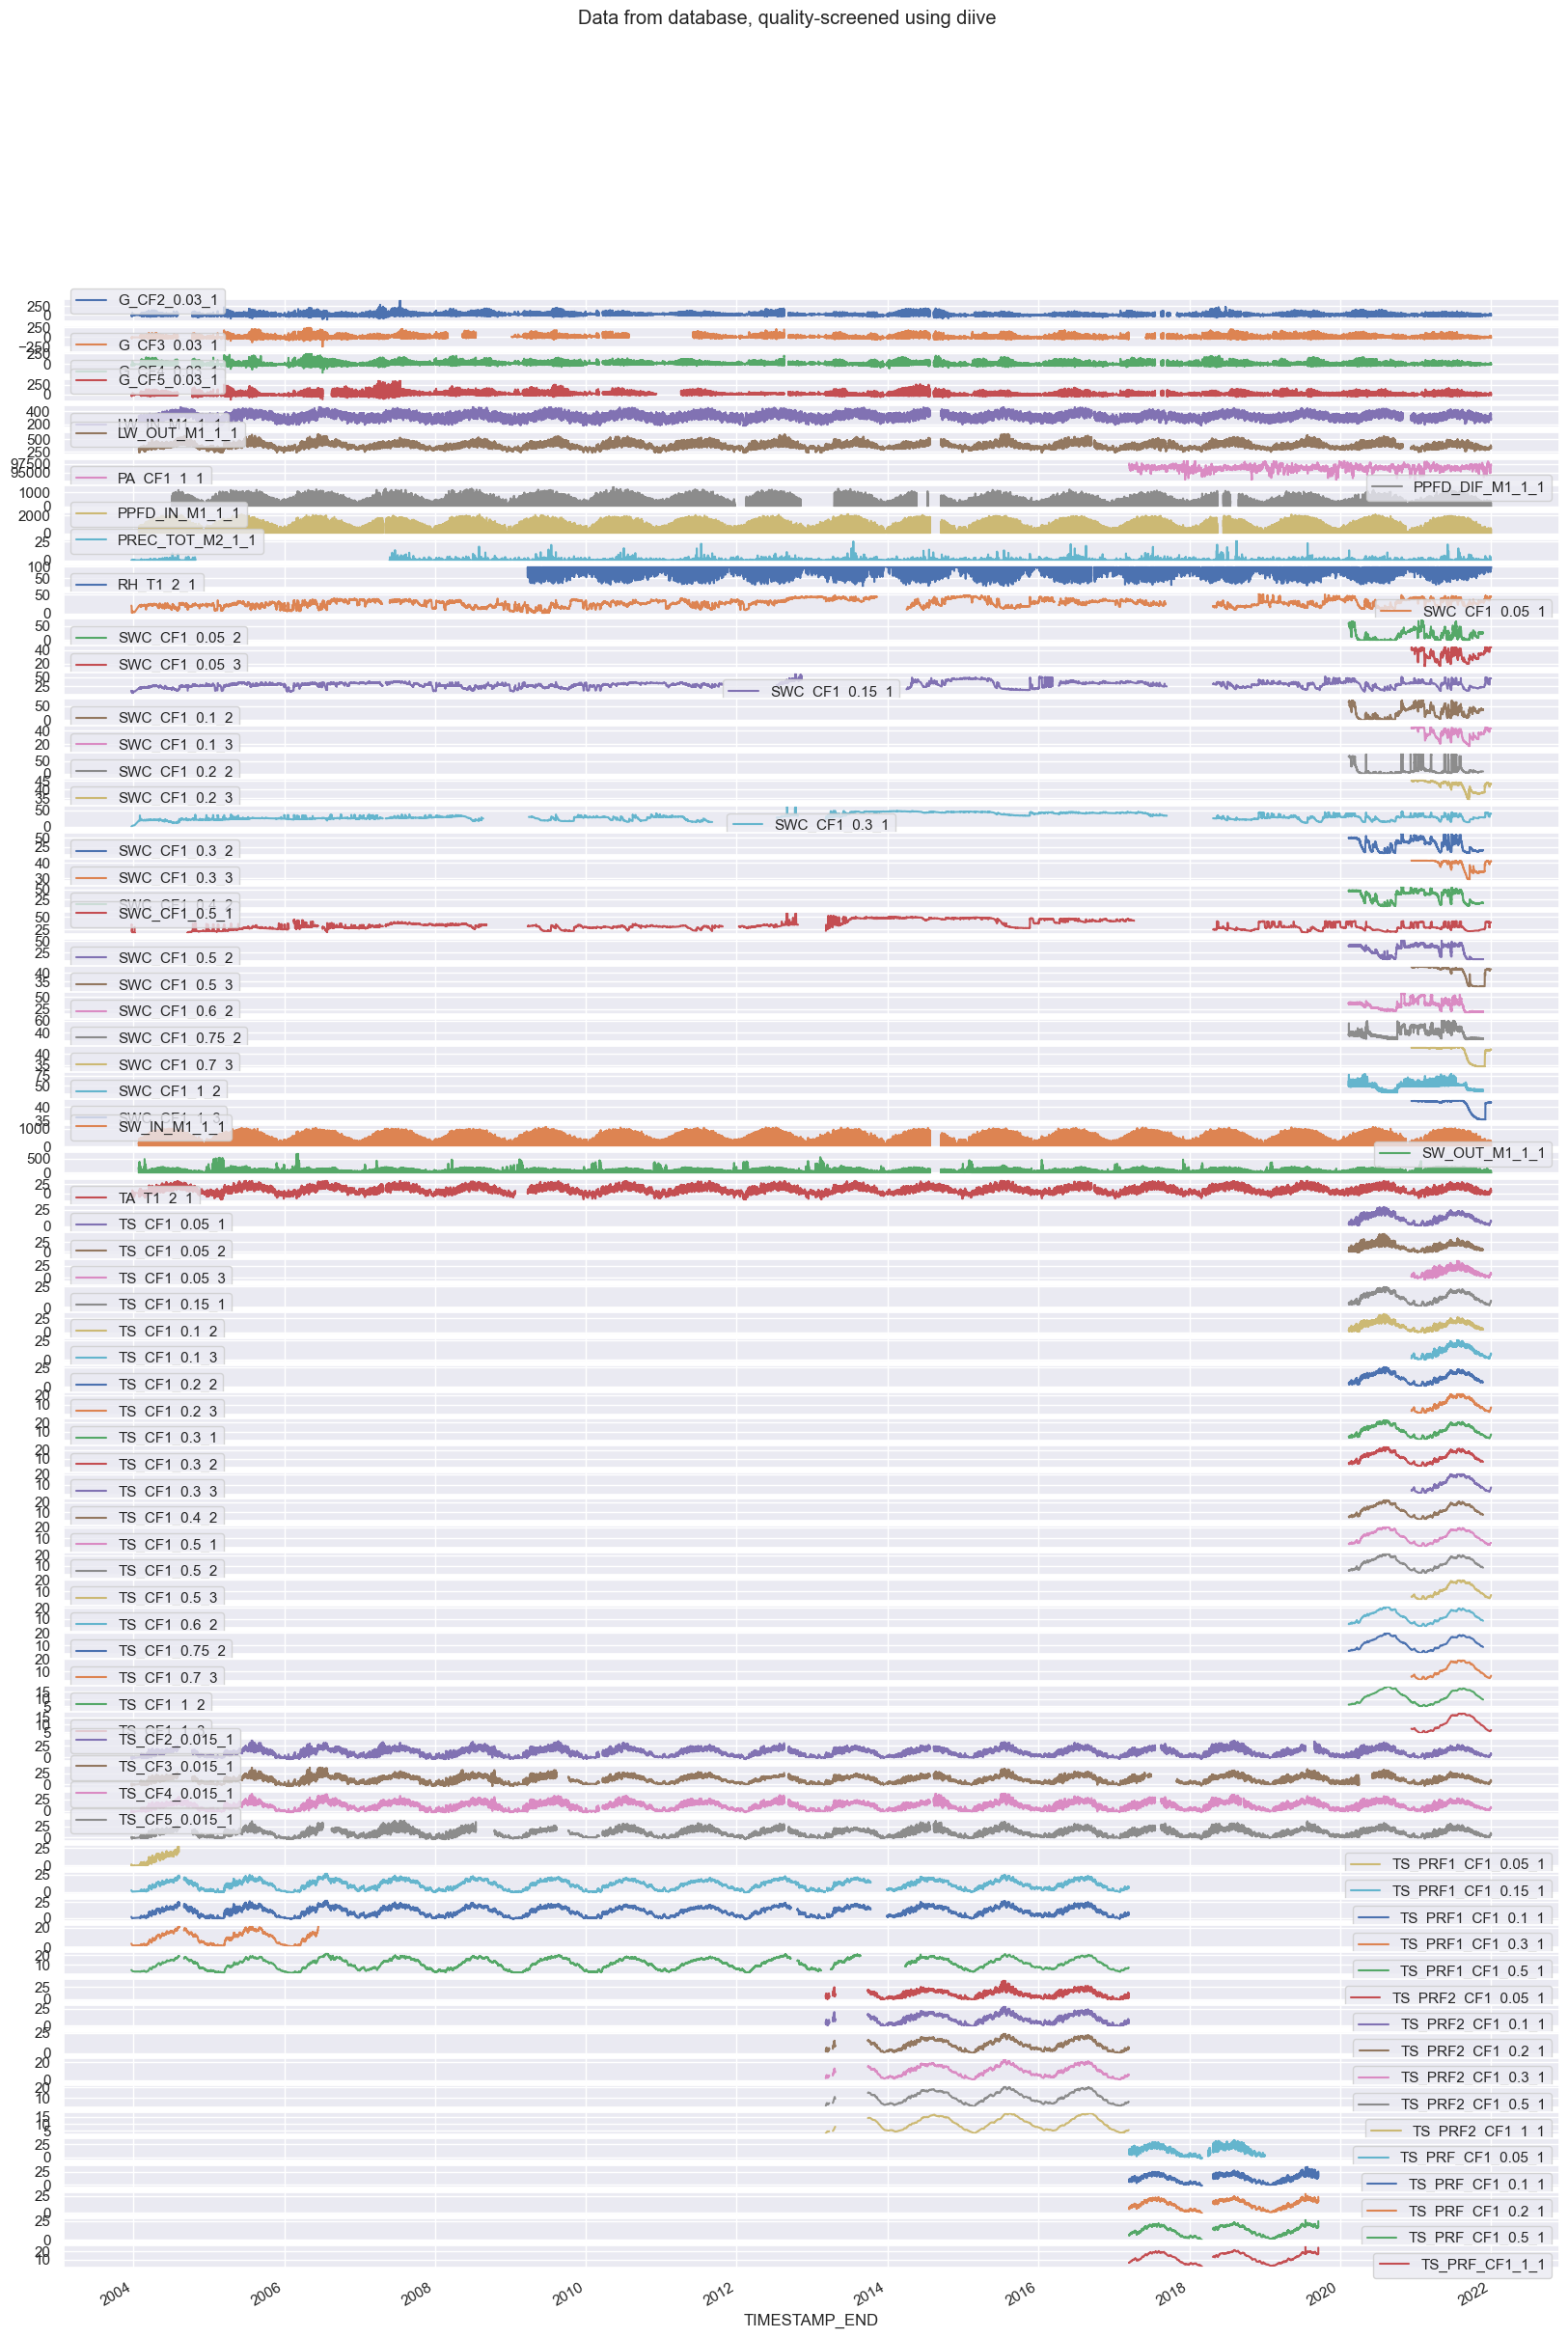

In [6]:
data_simple.plot(subplots=True, x_compat=True, title="Data from database, quality-screened using diive", figsize=(20, 30));

</br>

# **SAVE TO FILE**

In [7]:
OUTNAME = "12.3_CH-OE2_DATABASE_meteo_2003-2021"
OUTPATH = r""
filepath = save_parquet(filename=OUTNAME, data=data_simple, outpath=OUTPATH)
data_simple.to_csv(Path(OUTPATH) / f"{OUTNAME}.csv")

Saved file 12.3_CH-OE2_DATABASE_meteo_2003-2021.parquet (0.489 seconds).


</br>

## Heatmaps

F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\core\plotting\heatmap_base.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self.fig, self.ax = plt.subplots(constrained_layout=True, figsize=self.figsize, dpi=self.figdpi)


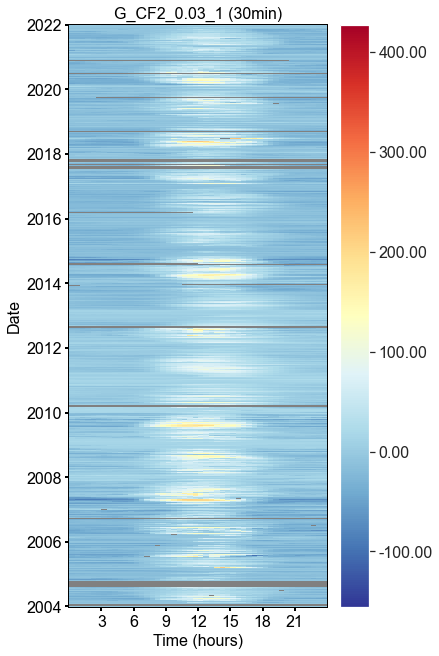

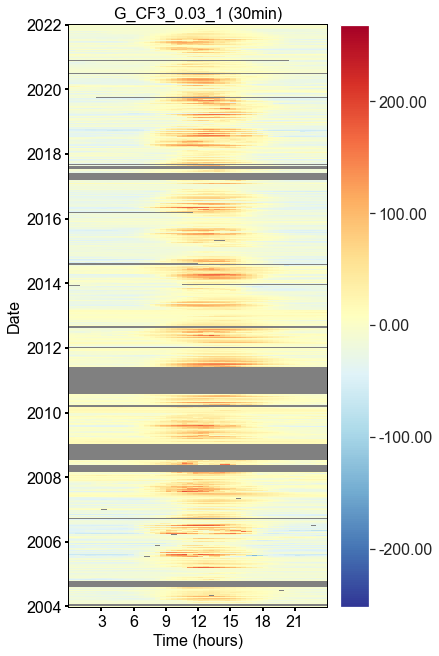

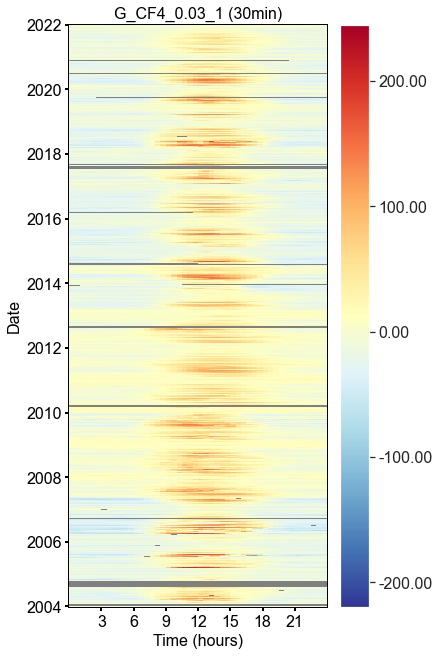

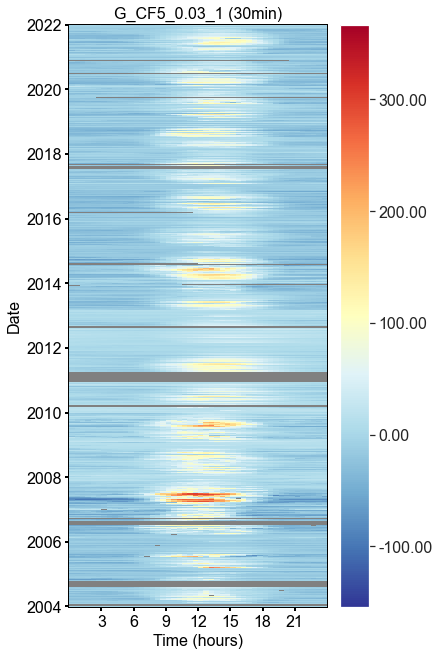

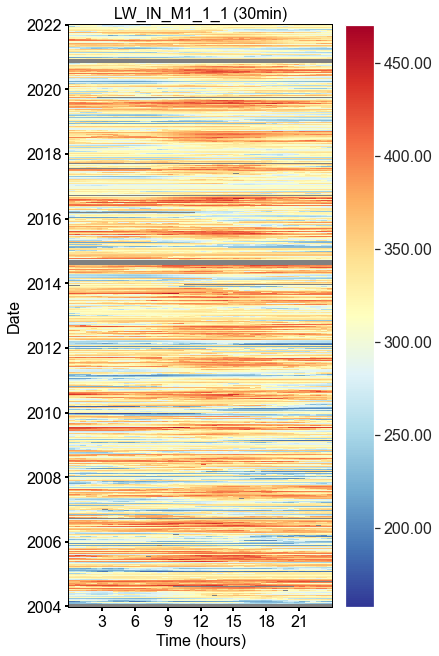

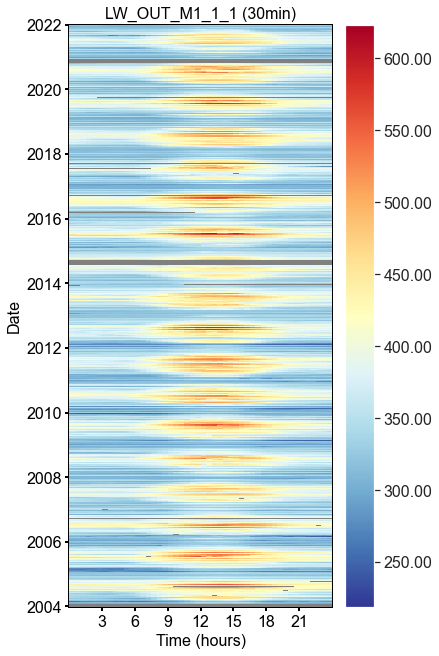

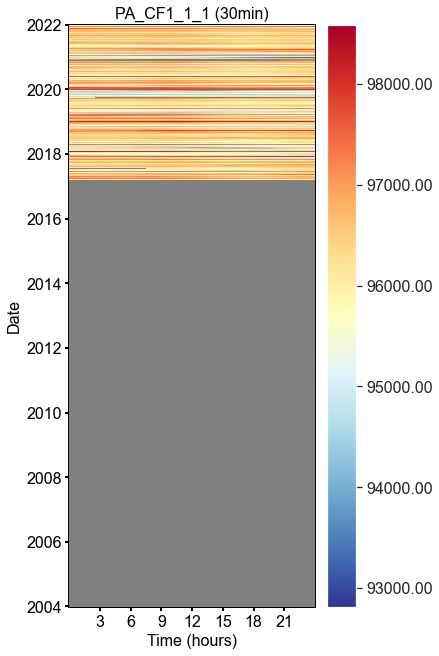

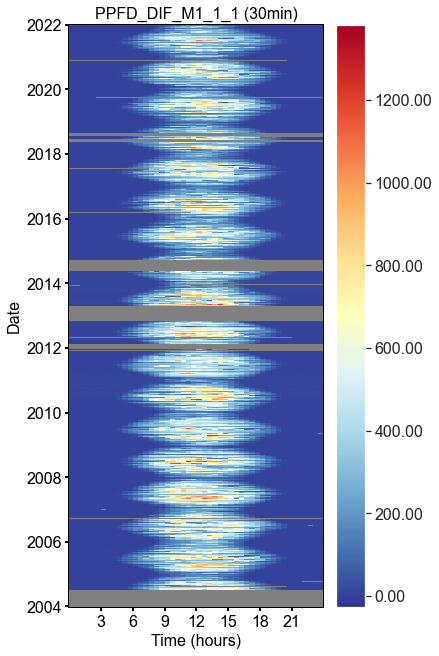

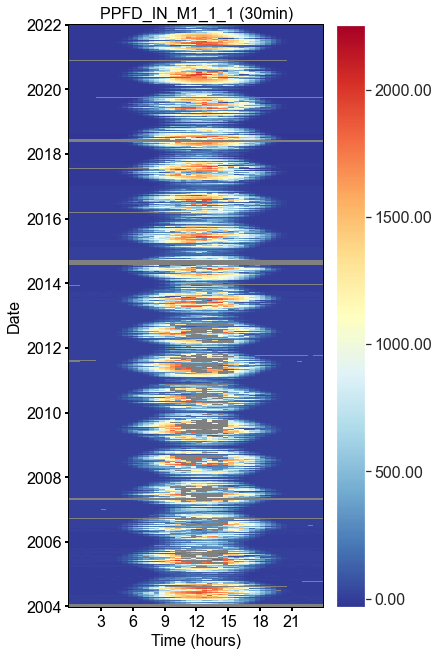

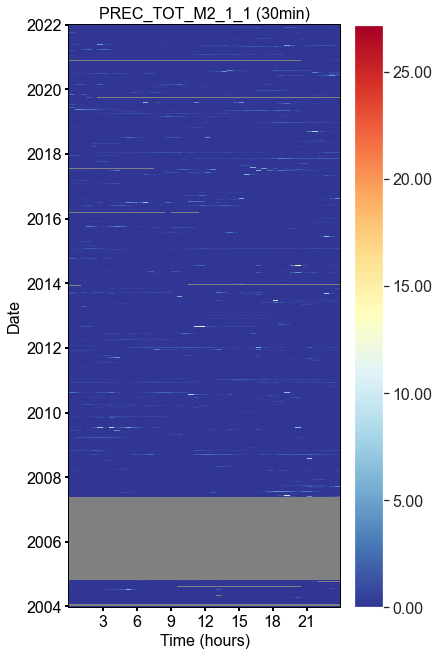

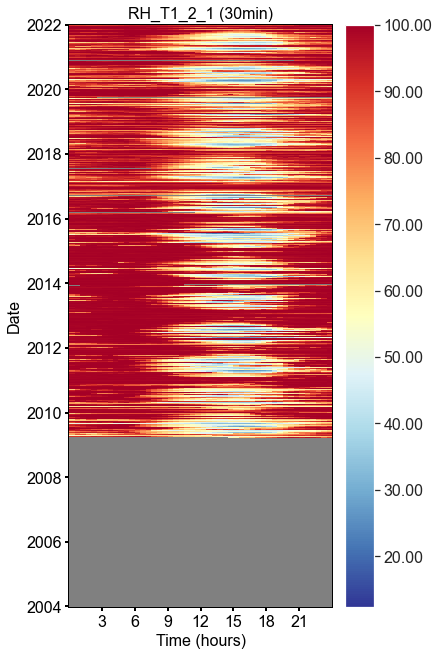

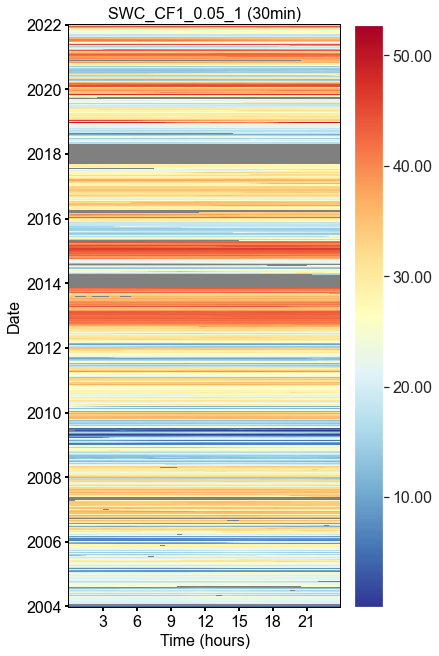

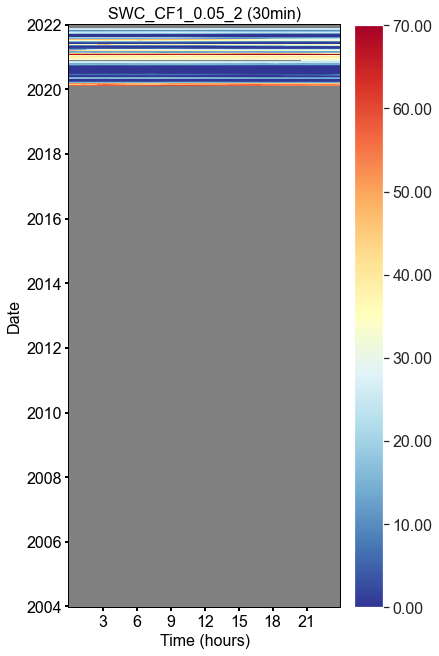

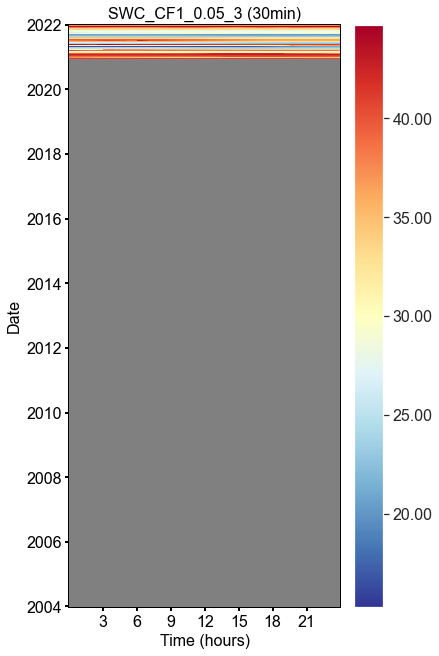

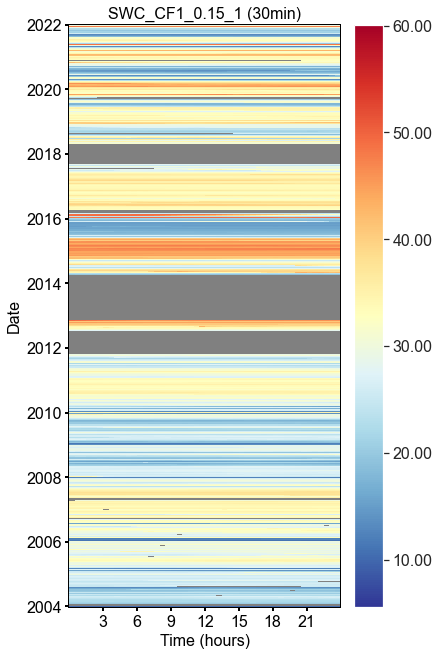

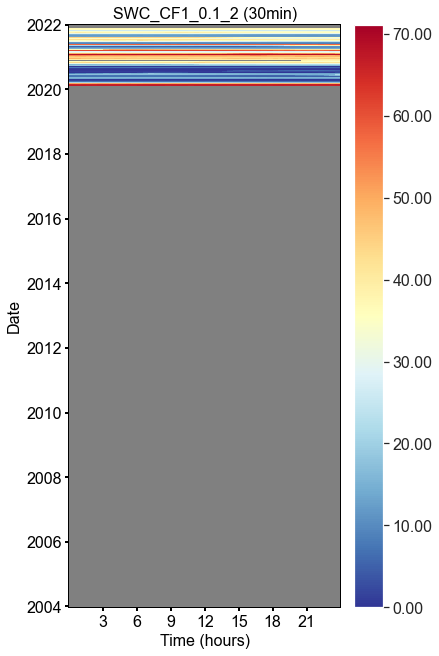

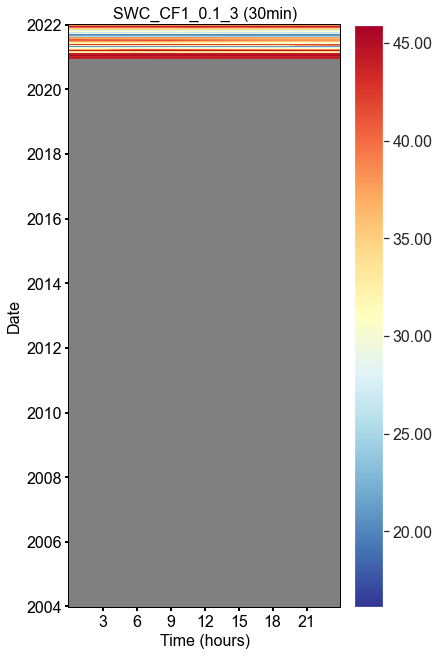

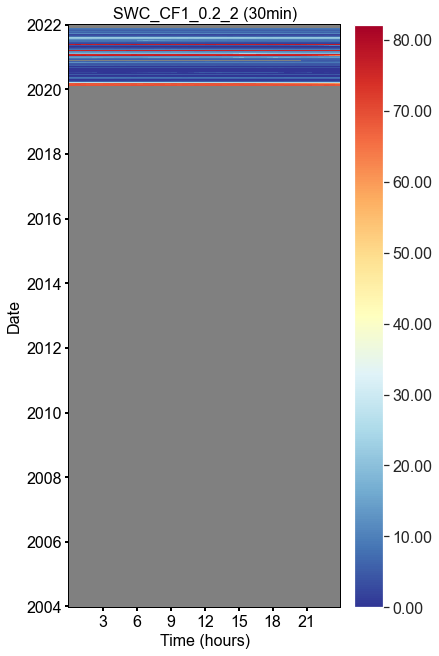

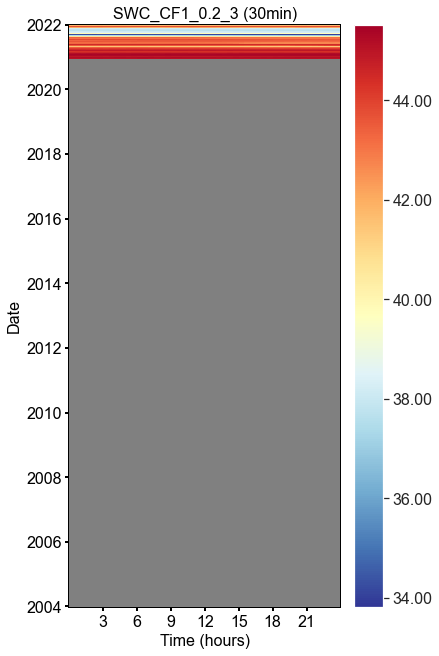

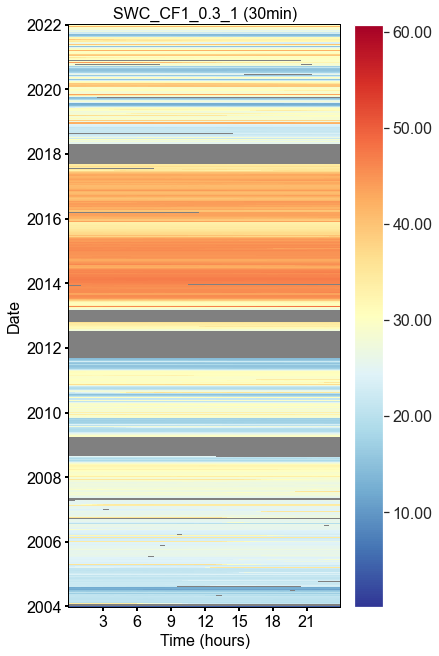

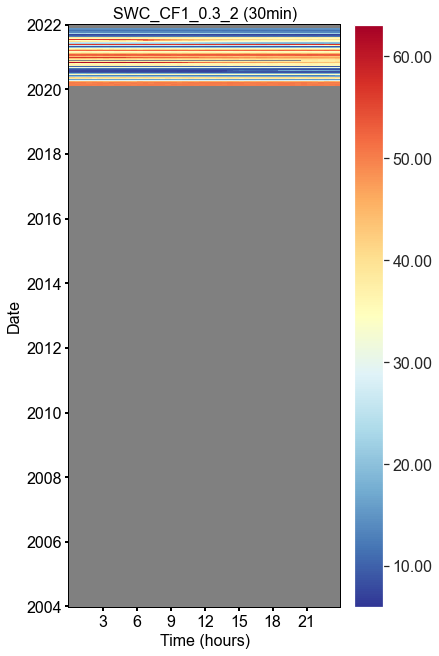

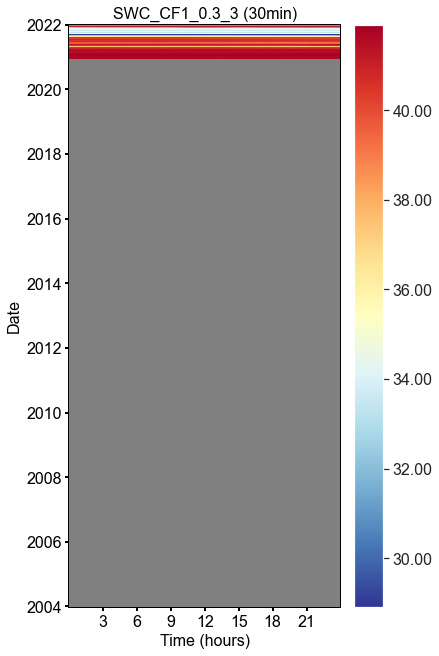

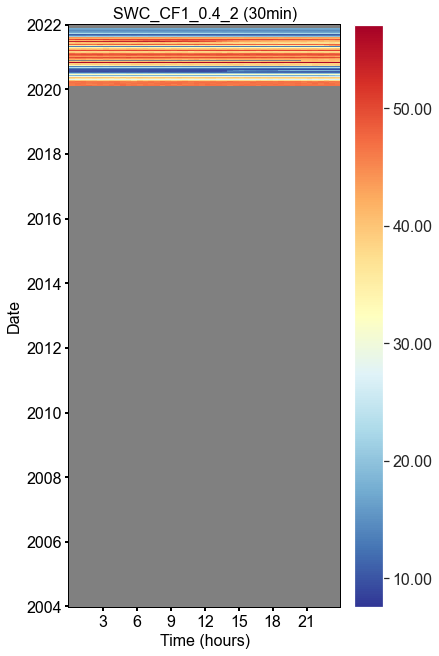

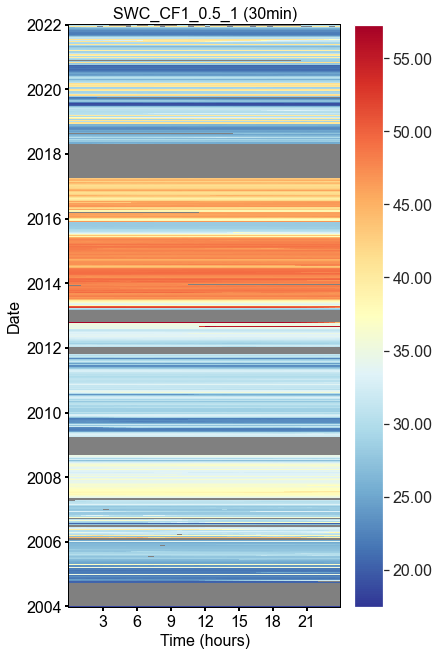

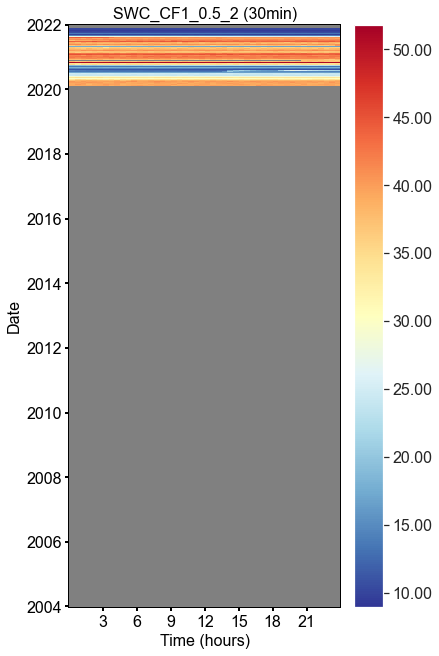

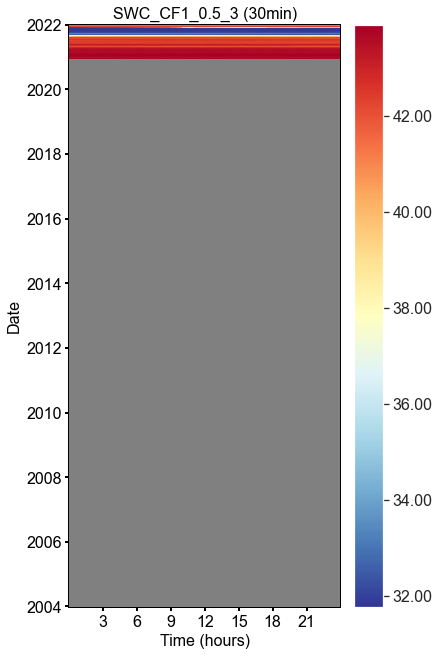

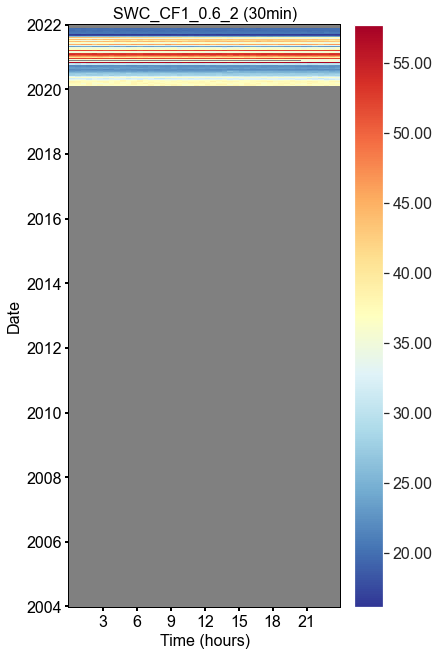

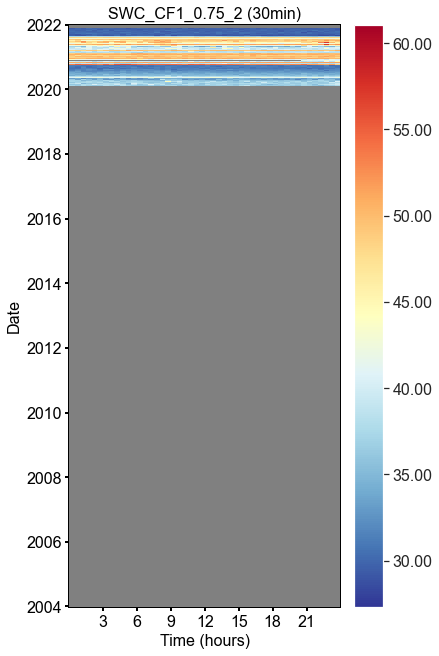

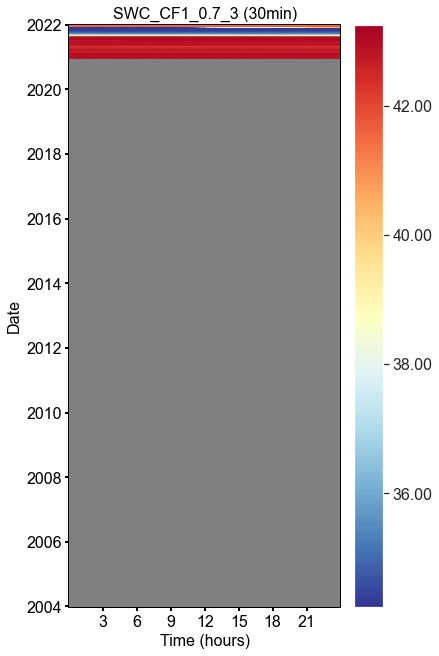

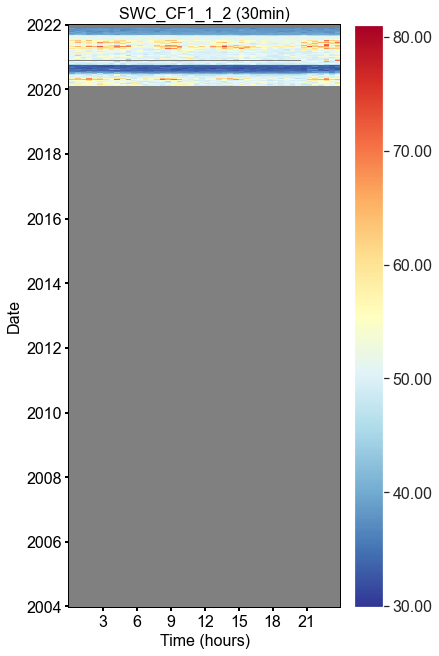

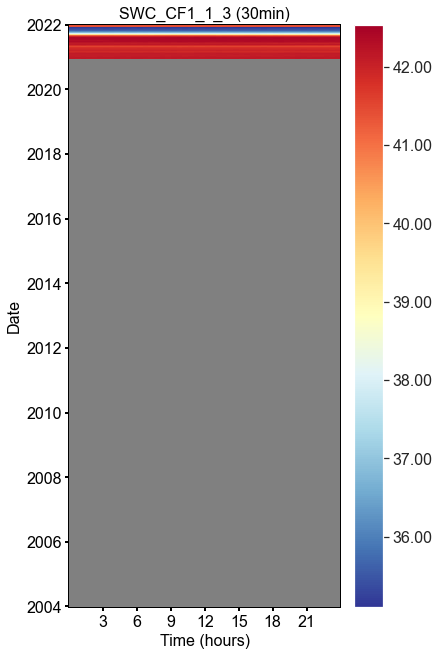

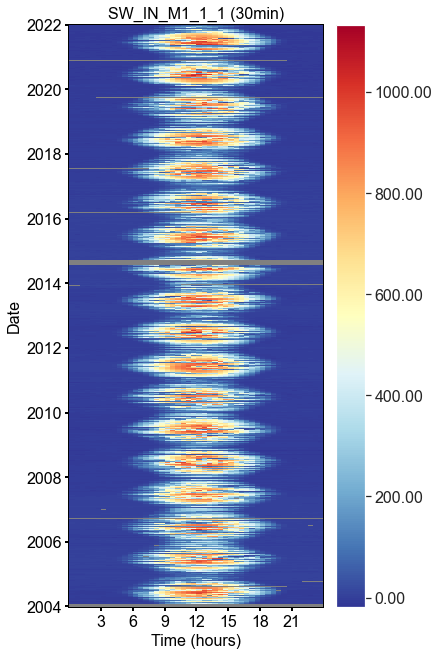

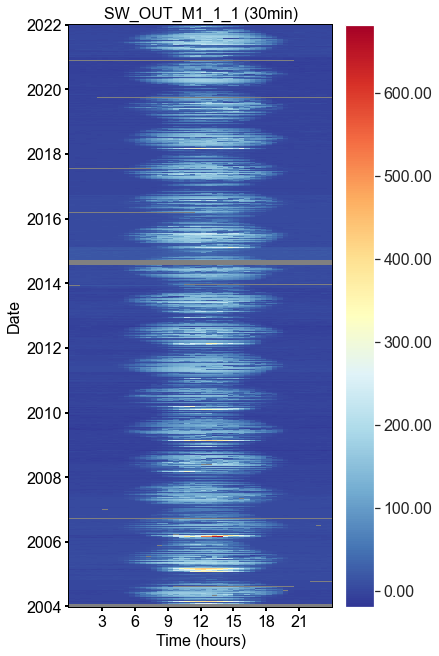

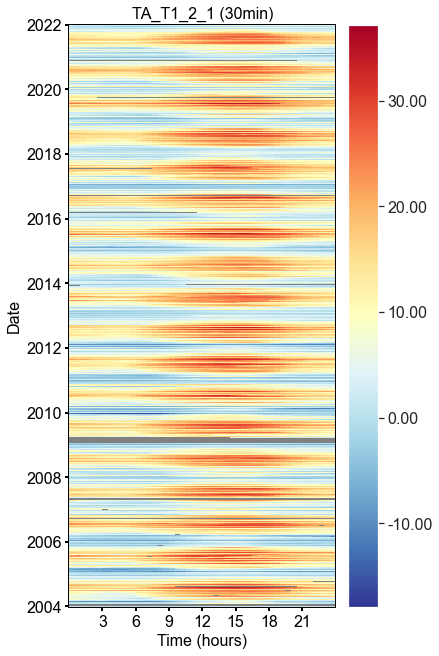

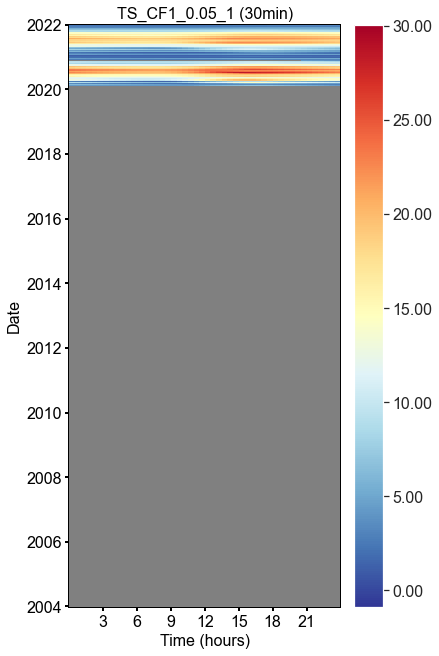

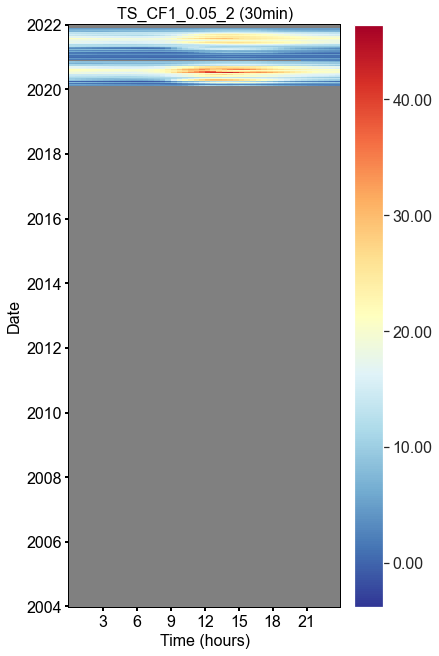

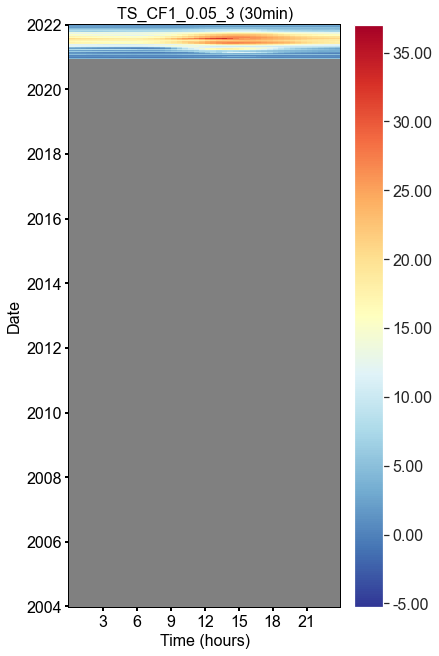

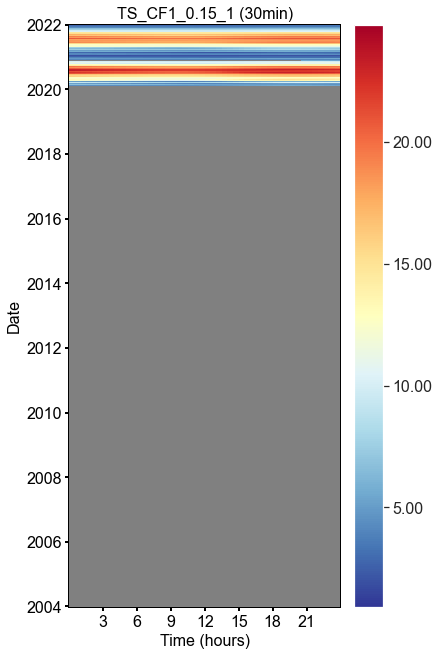

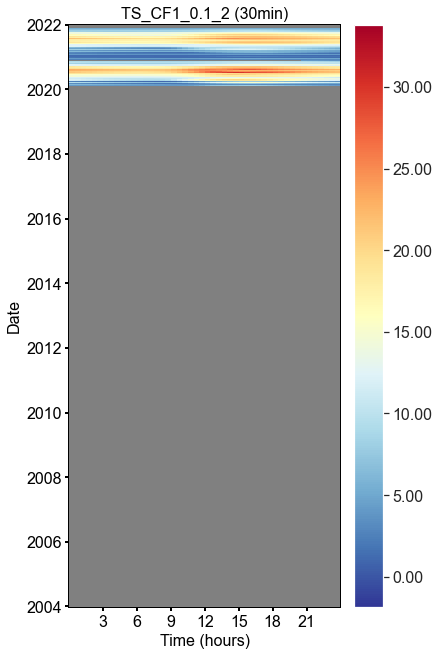

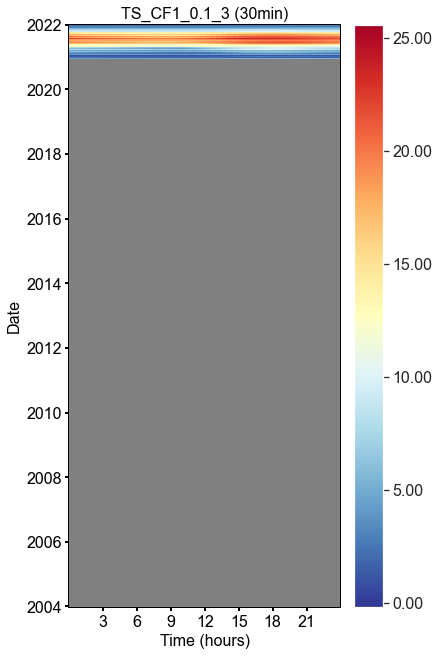

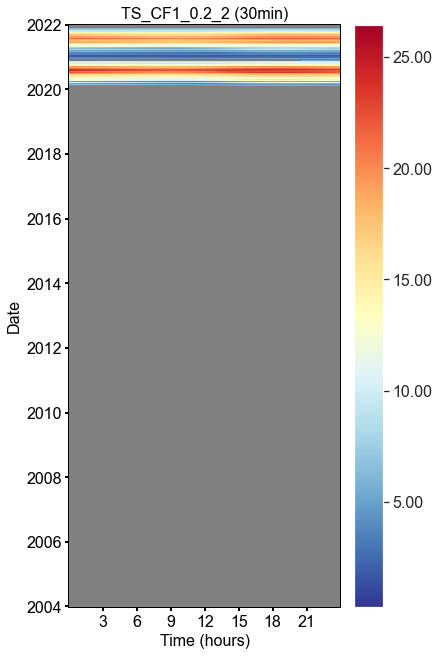

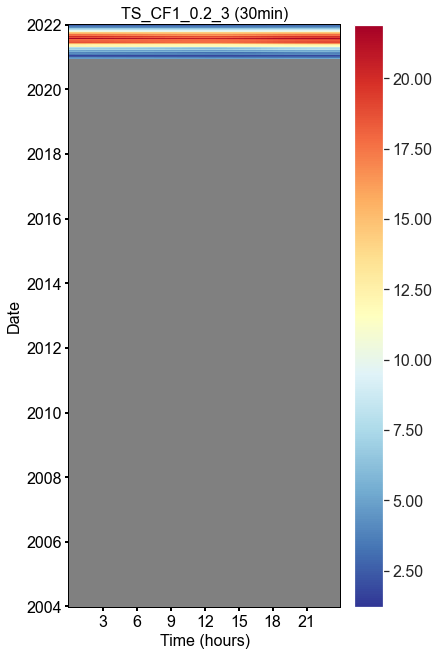

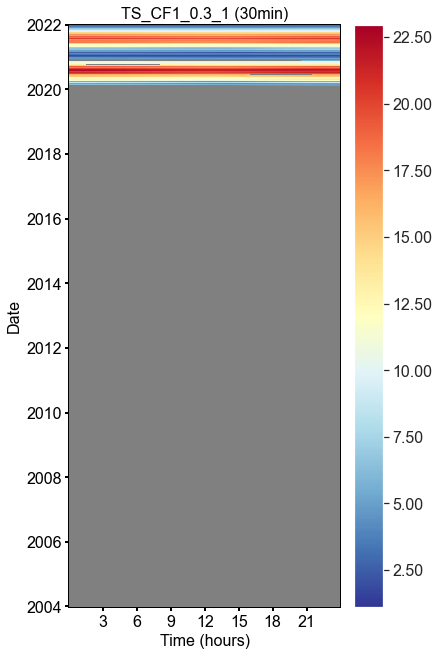

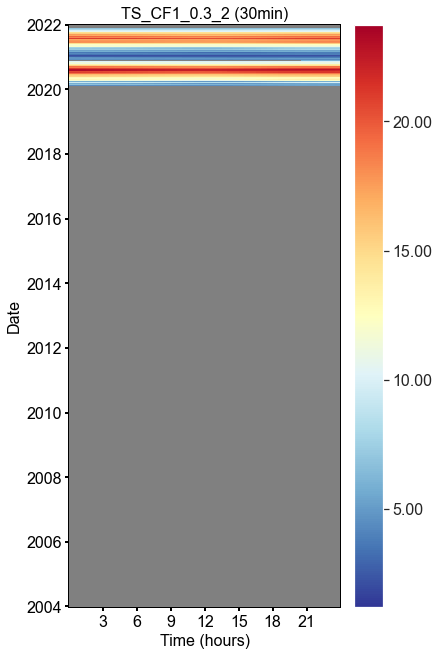

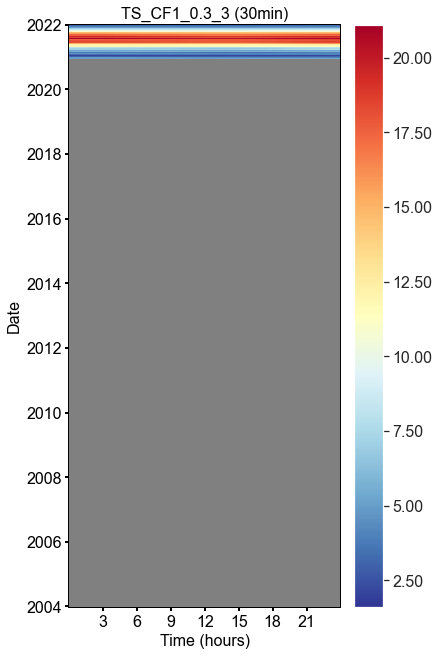

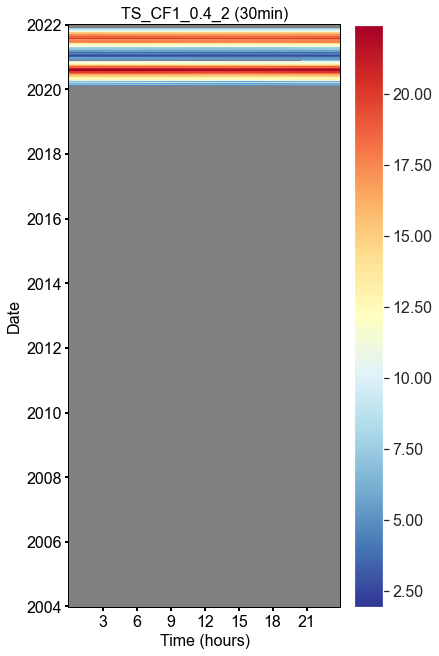

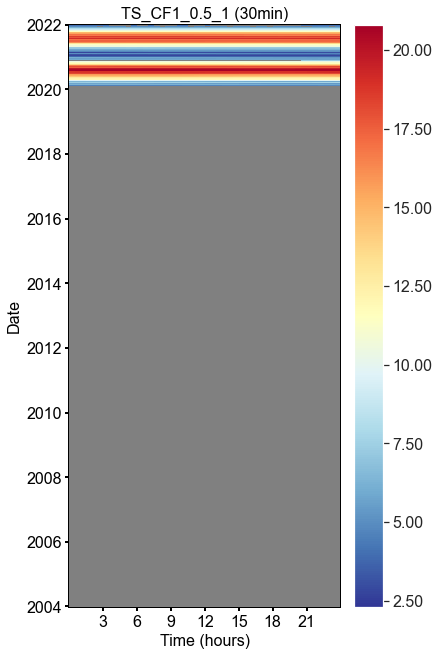

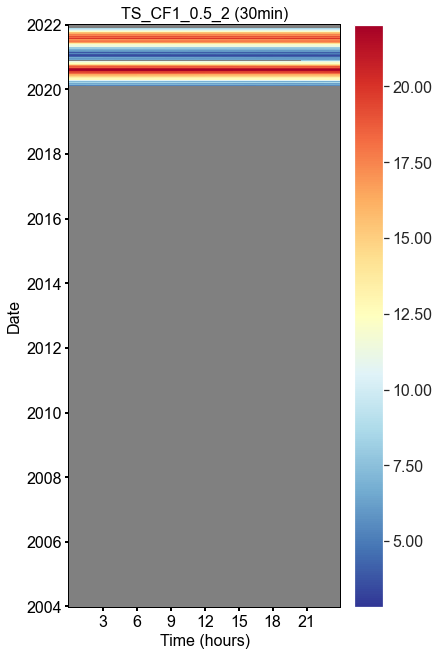

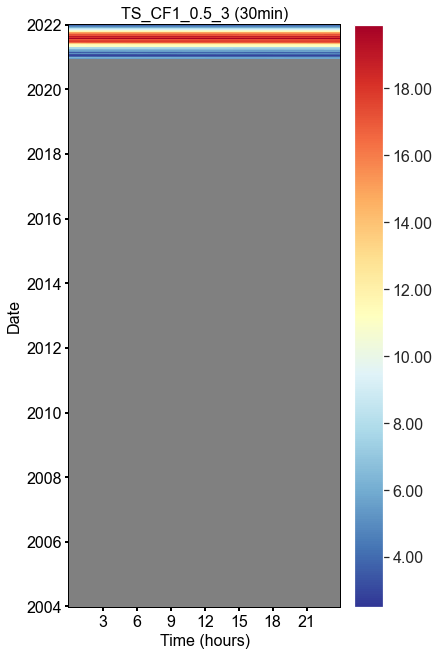

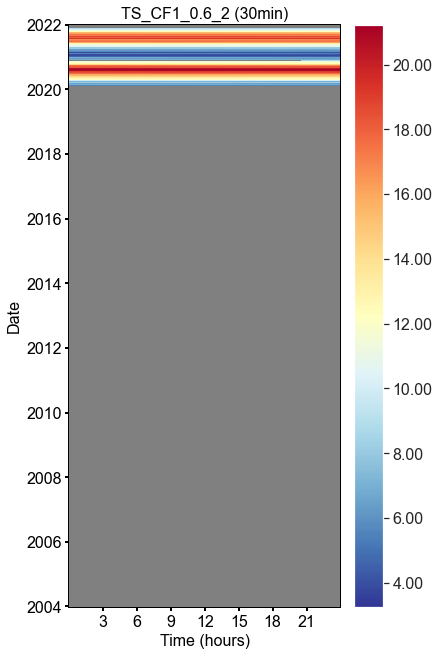

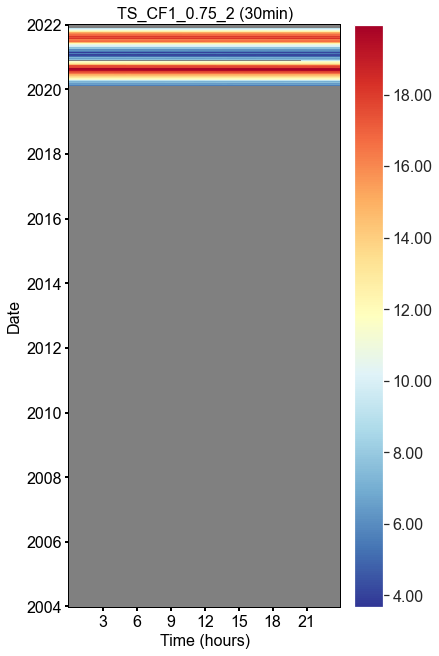

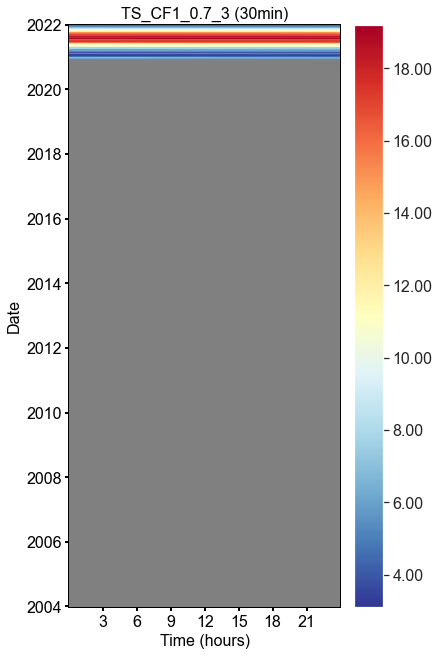

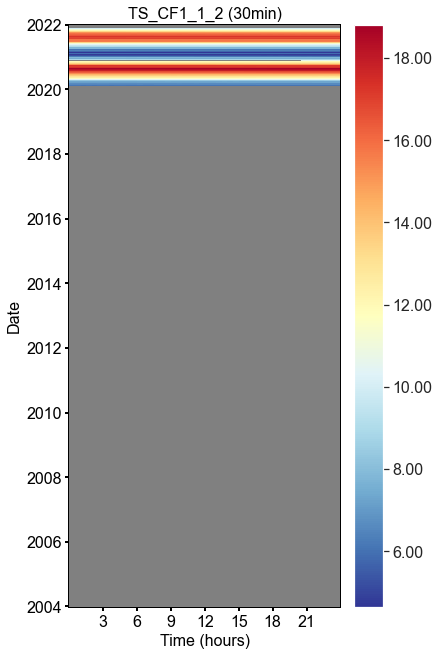

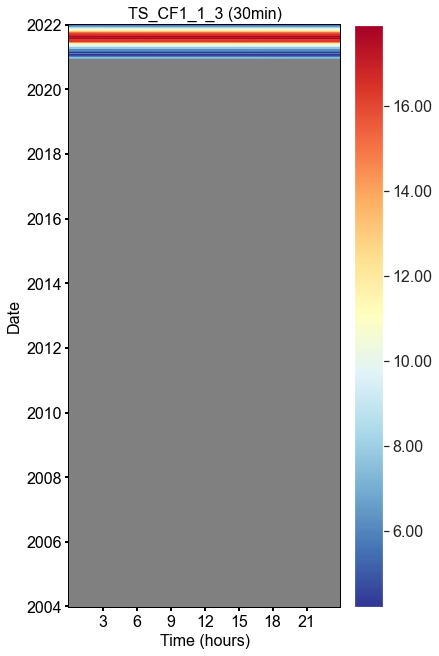

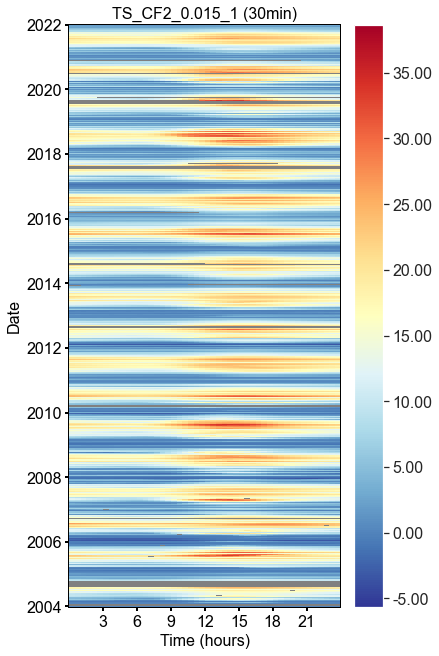

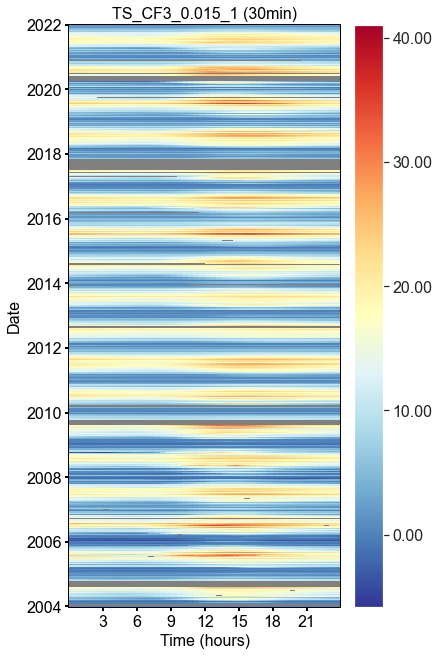

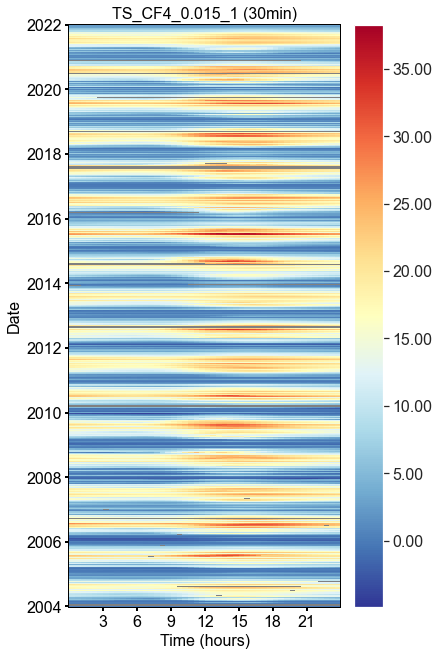

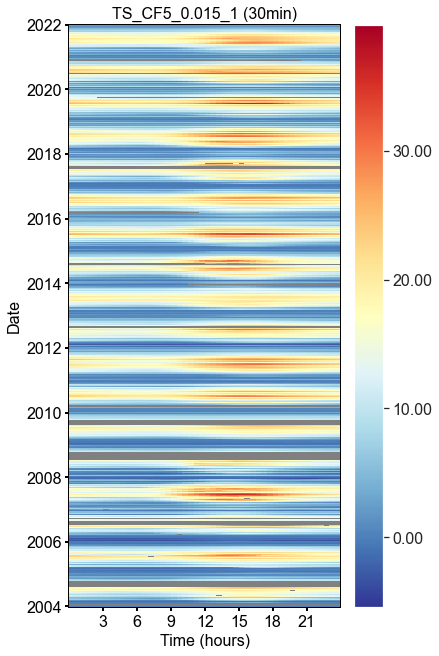

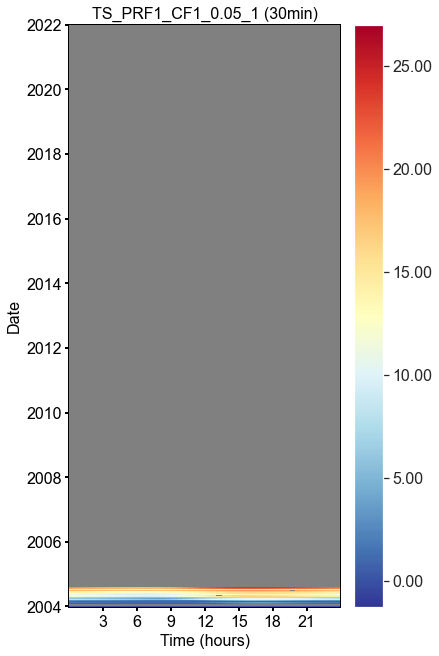

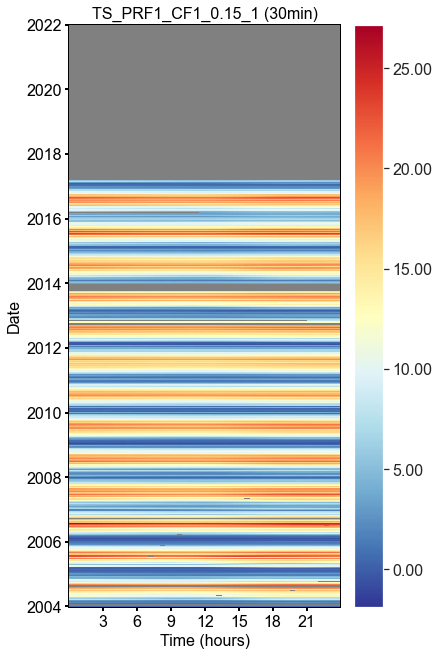

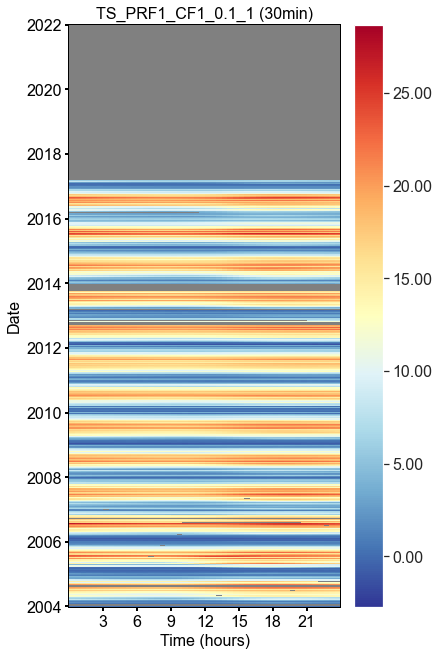

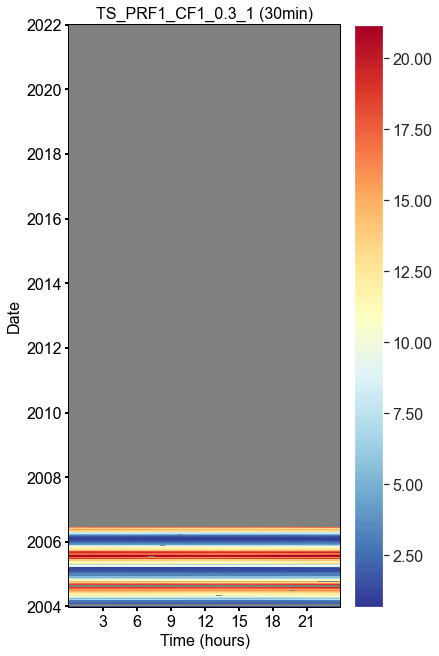

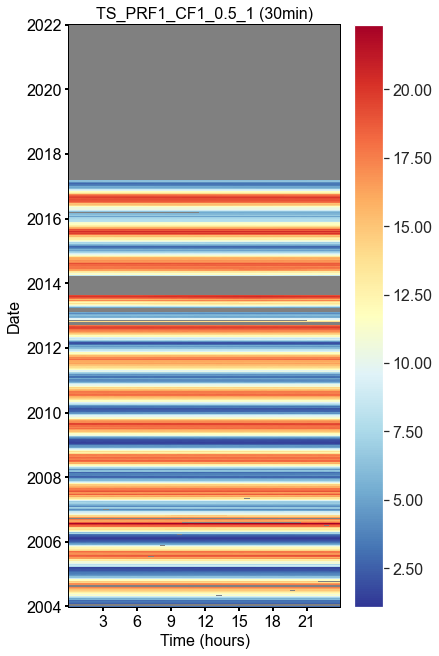

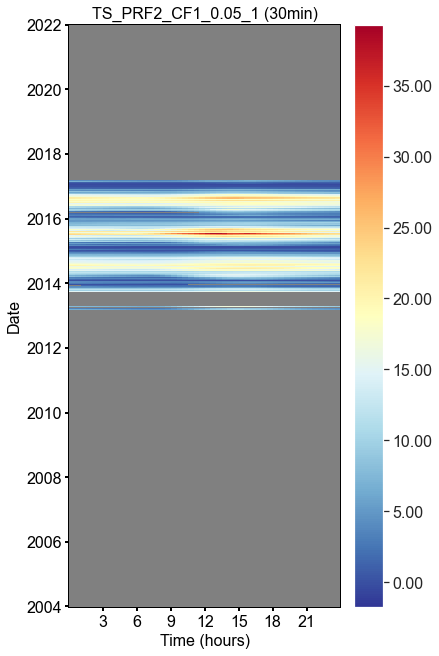

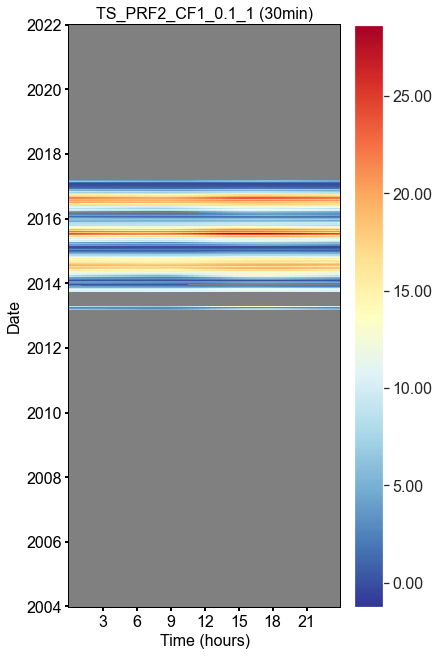

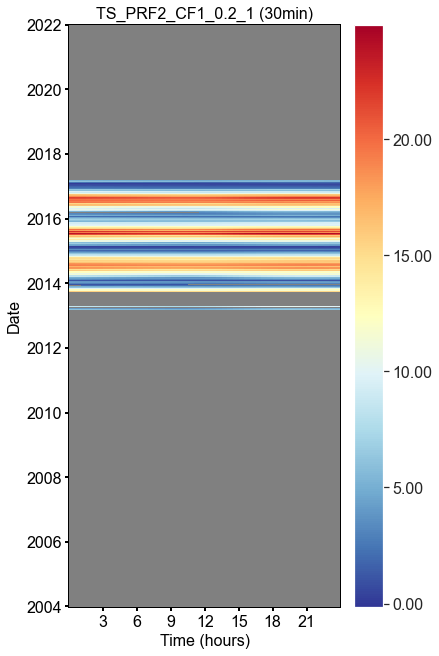

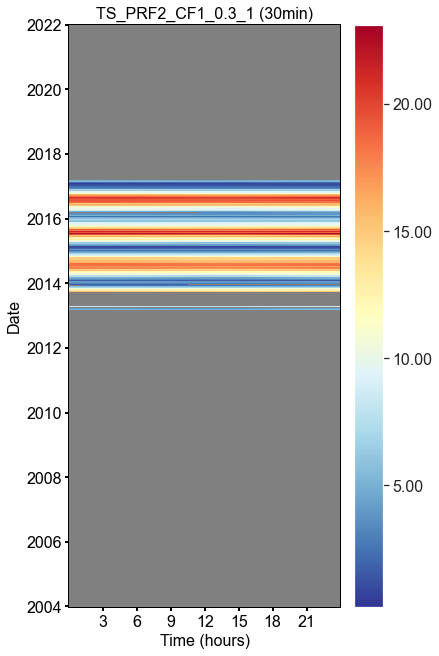

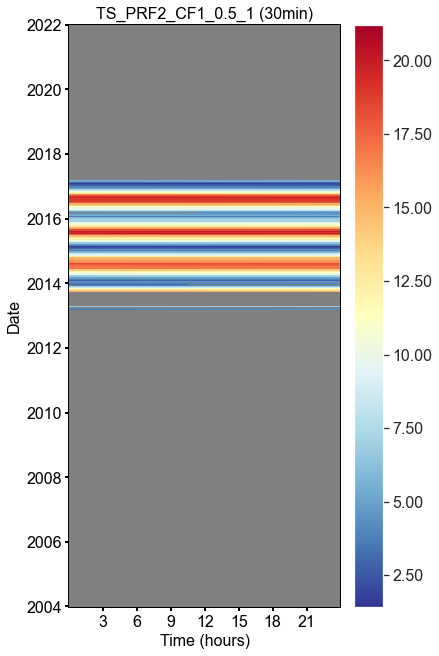

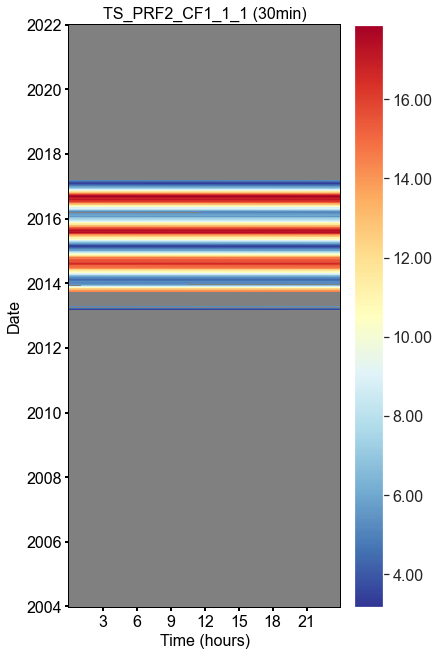

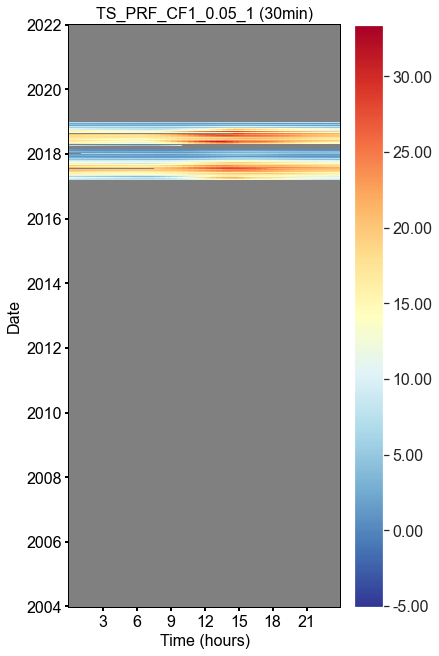

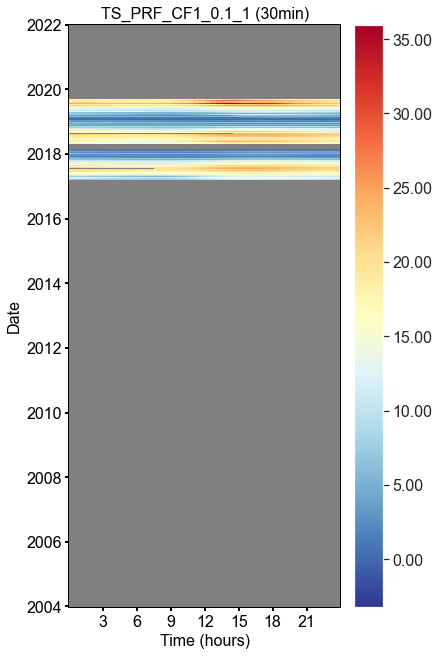

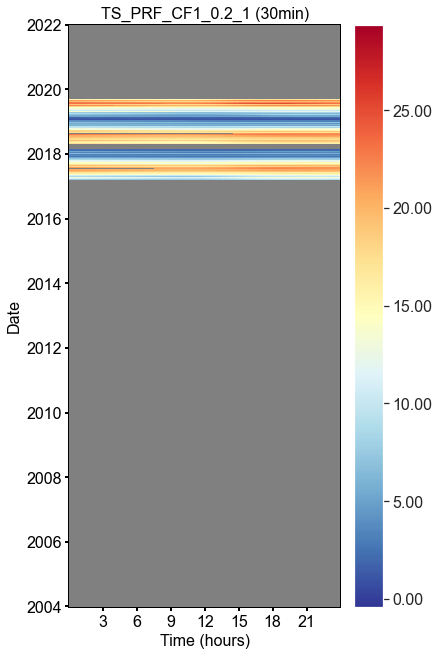

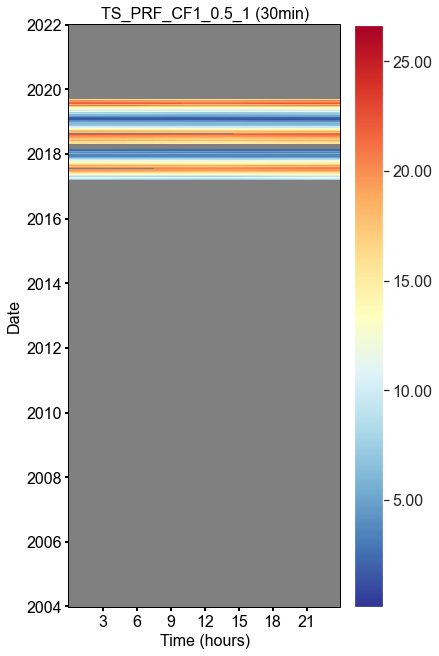

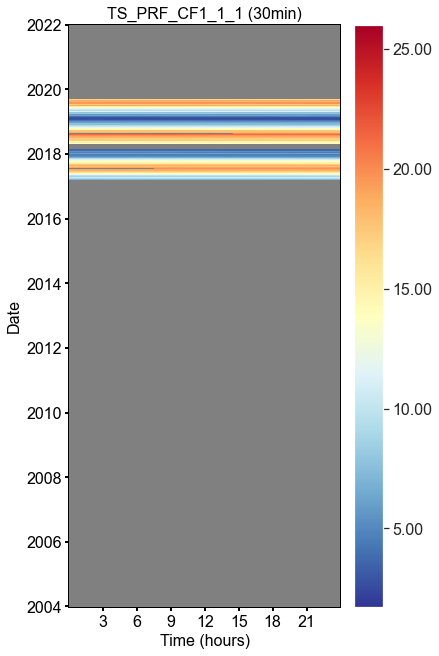

In [8]:
for col in data_simple.columns:
    series = data_simple[col]
    series.name = col
    HeatmapDateTime(series, figsize=(6, 9)).show()

</br>

# **Stats**

In [9]:
data_simple.describe()

G_CF2_0.03_1   G_CF3_0.03_1   G_CF4_0.03_1   G_CF5_0.03_1   LW_IN_M1_1_1  LW_OUT_M1_1_1    PA_CF1_1_1  PPFD_DIF_M1_1_1  PPFD_IN_M1_1_1  PREC_TOT_M2_1_1      RH_T1_2_1  SWC_CF1_0.05_1  SWC_CF1_0.05_2  SWC_CF1_0.05_3  SWC_CF1_0.15_1  ...  TS_PRF1_CF1_0.15_1  TS_PRF1_CF1_0.1_1  TS_PRF1_CF1_0.3_1  TS_PRF1_CF1_0.5_1  TS_PRF2_CF1_0.05_1  TS_PRF2_CF1_0.1_1  TS_PRF2_CF1_0.2_1  TS_PRF2_CF1_0.3_1  TS_PRF2_CF1_0.5_1  TS_PRF2_CF1_1_1  TS_PRF_CF1_0.05_1  TS_PRF_CF1_0.1_1  TS_PRF_CF1_0.2_1  TS_PRF_CF1_0.5_1  TS_PRF_CF1_1_1
count  300360.000000  271139.000000  302460.000000  294679.000000  305761.000000  305762.000000  82999.000000    282655.000000   297036.000000    267039.000000  221253.000000   289528.000000    30792.000000    18504.000000   262006.000000  ...       223044.000000      221981.000000       40622.000000      213643.000000        61009.000000       61009.000000       61009.000000       61009.000000       61009.000000     61009.000000       28954.000000      41084.000000      41083.000000      41083.000000    41083.000000
mean        3.519634       2.493135       3.285961       3.493979     326.171200     371.091803  96311.609437       142.207019      242.966628         0.065582      83.958126       26.879620       16.292102       32.416683       29.356500  ...           10.307981          10.387370           9.346321          11.012721           10.032278           9.928209          10.155592          10.133849          10.443066        10.266232          12.476949         12.307493         12.346748         12.132612       12.214157
std        30.227411      31.006248      29.402003      33.465821      46.338296      50.584498    757.736380       205.937853      421.852686         0.386552      18.774921        9.371585       16.667699        7.084986        7.750567  ...            6.424098           6.741664           5.999058           5.495091            6.947347           6.557026           6.177911           5.880612           5.412668         4.397128           7.557139          7.336538          6.592440          6.243414        5.585993
min      -155.899994    -252.500000    -219.899994    -154.500000     157.347198     218.596909  92809.364000       -27.859999      -34.244164         0.000000      12.321725        0.001000        0.000000       15.279953        5.544000  ...           -1.887000          -2.740000           0.663000           1.071000           -1.775333          -1.259000          -0.163333           0.207000           1.402333         3.169800          -5.087333         -3.235611         -0.426667          0.100111        1.712222
25%       -14.930835     -16.275419     -14.792137     -15.924753     297.407501     332.025241  95940.253333         0.698994        0.982775         0.000000      72.085021       20.120001        0.200025       27.202003       24.670000  ...            4.263600           4.081766           2.958000           5.866000            3.982333           4.123000           4.591666           4.713334           5.120333         5.849334           5.846639          5.587583          6.126666          6.346416        7.030583
50%        -2.559000      -4.900000      -2.310884      -3.325500     329.507233     364.523417  96375.523667         7.310000        6.982311         0.000000      92.766129       27.200001       11.412392       32.874802       29.670000  ...           10.670000          10.730000           9.720000          11.439333            9.548666           9.643665           9.973333           9.920002          10.291334        10.279667          12.954666         12.869778         13.053555         12.819111       13.106944
75%        14.540000      13.258329      13.909531      14.150000     358.863464     401.555946  96755.057833       241.200012      306.730003         0.000000      99.326973       33.630001       27.005304       38.452852       33.950001  ...           15.990000          16.299999          14.340000          16.030001           15.751001       

</br>

# **End of notebook**.

In [10]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-07-13 01:14:04


</br>